In [89]:
!pip install matplotlib numpy pandas

In [90]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

dir = r"C:/Users/Luís Gustavo/Documents/vscode - projects/github/ufpe_numeros/dataset"

dados_graduacao = pd.read_csv(dir + '/graduacao.csv', sep=';')
dados_ingresso = pd.read_csv(dir + '/vagas_novas.csv', sep=';')

for ii in os.listdir(dir):
    print(dir + '/' + ii)

C:/Users/Luís Gustavo/Documents/vscode - projects/github/ufpe_numeros/dataset/graduacao.csv
C:/Users/Luís Gustavo/Documents/vscode - projects/github/ufpe_numeros/dataset/vagas_novas.csv


In [92]:
centros = ["CTG", "CAC", "CCEN", "CCM", "CCS", "CCSA", "CFCH", "CB"]

cursosCTG = {}

for ii in range(dados_graduacao.shape[0]):
    
    if dados_graduacao["Centro"][ii] == "CCM":
        if dados_graduacao["Curso"][ii] not in cursosCTG:
            cursosCTG[dados_graduacao["Curso"][ii]] = {}

            periodo = str(dados_graduacao["Ano"][ii]) + "." + str(dados_graduacao["Semestre"][ii])
            cursosCTG[dados_graduacao["Curso"][ii]][periodo] = [int(dados_graduacao["Matriculados"][ii]),
                                                                int(dados_graduacao["Ingressantes"][ii]),
                                                                int(dados_graduacao["Concluintes"][ii]),
                                                                int(dados_graduacao["Desligados"][ii]),
                                                                int(dados_graduacao["Trancados"][ii])]
        else:
            periodo = str(dados_graduacao["Ano"][ii]) + "." + str(dados_graduacao["Semestre"][ii])
            if periodo not in cursosCTG[dados_graduacao["Curso"][ii]]:
                cursosCTG[dados_graduacao["Curso"][ii]][periodo] = [int(dados_graduacao["Matriculados"][ii]),
                                                                    int(dados_graduacao["Ingressantes"][ii]),
                                                                    int(dados_graduacao["Concluintes"][ii]),
                                                                    int(dados_graduacao["Desligados"][ii]),
                                                                    int(dados_graduacao["Trancados"][ii])]
            else:
                cursosCTG[dados_graduacao["Curso"][ii]][periodo][0] += int(dados_graduacao["Matriculados"][ii])
                cursosCTG[dados_graduacao["Curso"][ii]][periodo][1] += int(dados_graduacao["Ingressantes"][ii])
                cursosCTG[dados_graduacao["Curso"][ii]][periodo][2] += int(dados_graduacao["Concluintes"][ii])
                cursosCTG[dados_graduacao["Curso"][ii]][periodo][3] += int(dados_graduacao["Desligados"][ii])
                cursosCTG[dados_graduacao["Curso"][ii]][periodo][4] += int(dados_graduacao["Trancados"][ii])

In [93]:
print(cursosCTG.keys())

dict_keys(['Medicina'])


In [94]:
select_curso = "Medicina"
dados_ENGENHARIA = cursosCTG[select_curso]
dados_ENGENHARIA_MATRICULADOS = {}
dados_ENGENHARIA_INGRESSANTES = {}
dados_ENGENHARIA_CONCLUINTES = {}
dados_ENGENHARIA_DESLIGADOS = {}
dados_ENGENHARIA_TRANCADOS = {}

for ii in range(len(dados_ENGENHARIA.keys())):
    periodo = list(dados_ENGENHARIA.keys())[ii]
    dados_ENGENHARIA_MATRICULADOS[periodo] = dados_ENGENHARIA[periodo][0]
    dados_ENGENHARIA_INGRESSANTES[periodo] = dados_ENGENHARIA[periodo][1]
    dados_ENGENHARIA_CONCLUINTES[periodo] = dados_ENGENHARIA[periodo][2]
    dados_ENGENHARIA_DESLIGADOS[periodo] = dados_ENGENHARIA[periodo][3]
    dados_ENGENHARIA_TRANCADOS[periodo] = dados_ENGENHARIA[periodo][4]

2016.1: 857
2016.2: 855
2017.1: 851
2017.2: 862
2018.1: 863
2018.2: 839
2019.1: 842
2019.2: 835
2020.1: 821
2020.2: 814
2021.1: 815
2021.2: 816
2022.1: 819
2022.2: 816
Média: 836.07


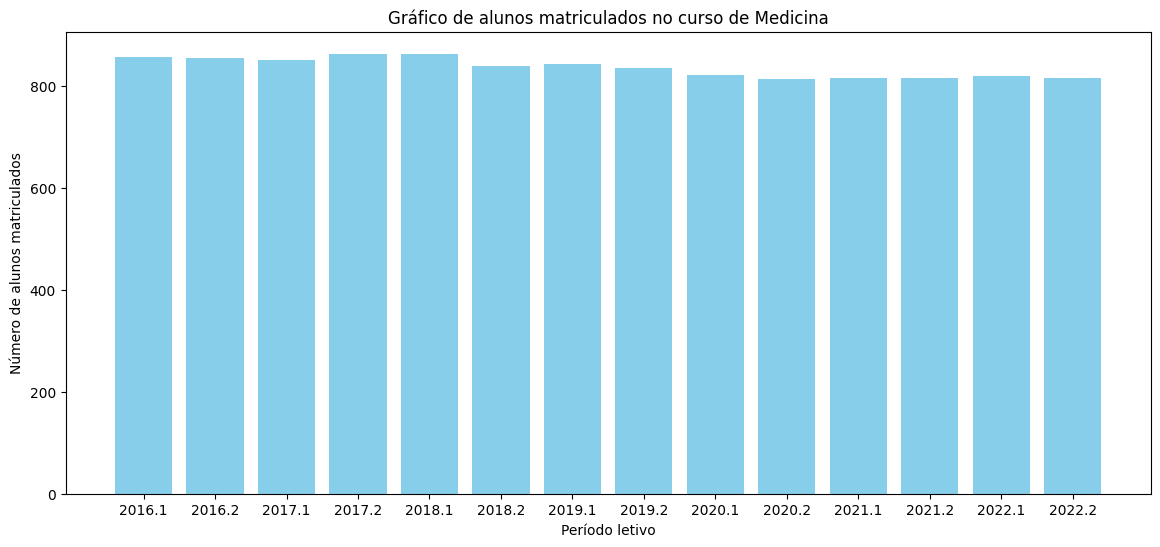

In [95]:
# Vertical Bar Plot
for ii, jj in zip(dados_ENGENHARIA_MATRICULADOS.keys(), dados_ENGENHARIA_MATRICULADOS.values()):
    print(f"{ii}: {jj}")

print(f"Média: {np.mean(list(dados_ENGENHARIA_MATRICULADOS.values())):.2f}")

plt.figure(figsize=(14, 6))
plt.bar(dados_ENGENHARIA.keys(), dados_ENGENHARIA_MATRICULADOS.values(), color='skyblue')
plt.xlabel('Período letivo')
plt.ylabel('Número de alunos matriculados')
plt.title(f'Gráfico de alunos matriculados no curso de {select_curso}')
plt.show()

2016.1: 72 (8.40%)
2016.2: 70 (8.19%)
2017.1: 70 (8.23%)
2017.2: 71 (8.24%)
2018.1: 69 (8.00%)
2018.2: 70 (8.34%)
2019.1: 72 (8.55%)
2019.2: 73 (8.74%)
2020.1: 72 (8.77%)
2020.2: 71 (8.72%)
2021.1: 70 (8.59%)
2021.2: 66 (8.09%)
2022.1: 70 (8.55%)
2022.2: 70 (8.58%)
Média: 70.43


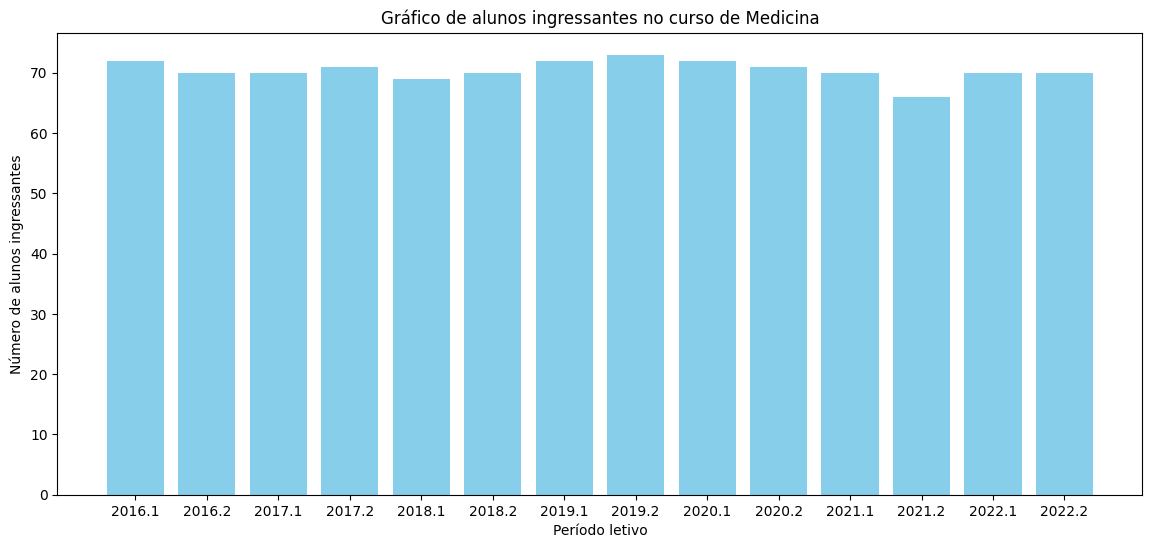

In [96]:
# Vertical Bar Plot

for ii, jj, kk in zip(dados_ENGENHARIA_MATRICULADOS.keys(), dados_ENGENHARIA_MATRICULADOS.values(), dados_ENGENHARIA_INGRESSANTES.values()):
    print(f"{ii}: {kk} ({kk/jj*100:.2f}%)")

print(f"Média: {np.mean(list(dados_ENGENHARIA_INGRESSANTES.values())):.2f}")

plt.figure(figsize=(14, 6))
plt.bar(dados_ENGENHARIA.keys(), dados_ENGENHARIA_INGRESSANTES.values(), color='skyblue')
plt.xlabel('Período letivo')
plt.ylabel('Número de alunos ingressantes')
plt.title(f'Gráfico de alunos ingressantes no curso de {select_curso}')
plt.show()

2016.1: 60 (7.00%)
2016.2: 65 (7.60%)
2017.1: 57 (6.70%)
2017.2: 65 (7.54%)
2018.1: 86 (9.97%)
2018.2: 69 (8.22%)
2019.1: 76 (9.03%)
2019.2: 82 (9.82%)
2020.1: 75 (9.14%)
2020.2: 66 (8.11%)
2021.1: 63 (7.73%)
2021.2: 61 (7.48%)
2022.1: 76 (9.28%)
2022.2: 57 (6.99%)
Média de concluintes: 68.43


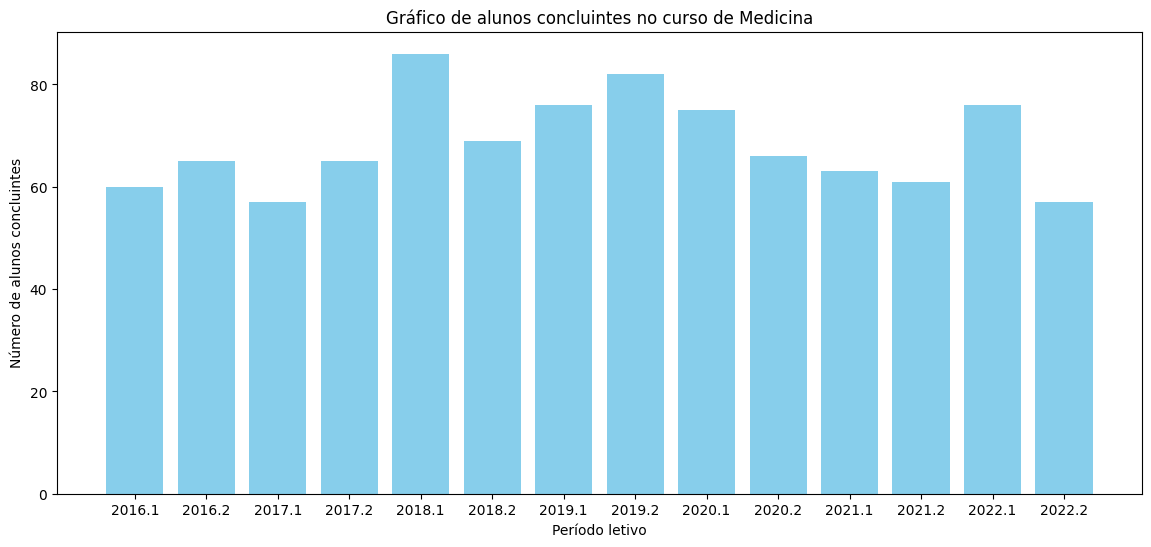

In [97]:
# Vertical Bar Plot

for ii, jj, kk in zip(dados_ENGENHARIA_MATRICULADOS.keys(), dados_ENGENHARIA_MATRICULADOS.values(), dados_ENGENHARIA_CONCLUINTES.values()):
    print(f"{ii}: {kk} ({kk/jj*100:.2f}%)")

print(f"Média de concluintes: {np.mean(list(dados_ENGENHARIA_CONCLUINTES.values())):.2f}")

plt.figure(figsize=(14, 6))
plt.bar(dados_ENGENHARIA.keys(), dados_ENGENHARIA_CONCLUINTES.values(), color='skyblue')
plt.xlabel('Período letivo')
plt.ylabel('Número de alunos concluintes')
plt.title(f'Gráfico de alunos concluintes no curso de {select_curso}')
plt.show()

2016.1: 0 (0.00%)
2016.2: 2 (0.23%)
2017.1: 6 (0.71%)
2017.2: 9 (1.04%)
2018.1: 8 (0.93%)
2018.2: 7 (0.83%)
2019.1: 5 (0.59%)
2019.2: 7 (0.84%)
2020.1: 7 (0.85%)
2020.2: 5 (0.61%)
2021.1: 6 (0.74%)
2021.2: 7 (0.86%)
2022.1: 11 (1.34%)
2022.2: 6 (0.74%)
Média: 6.14


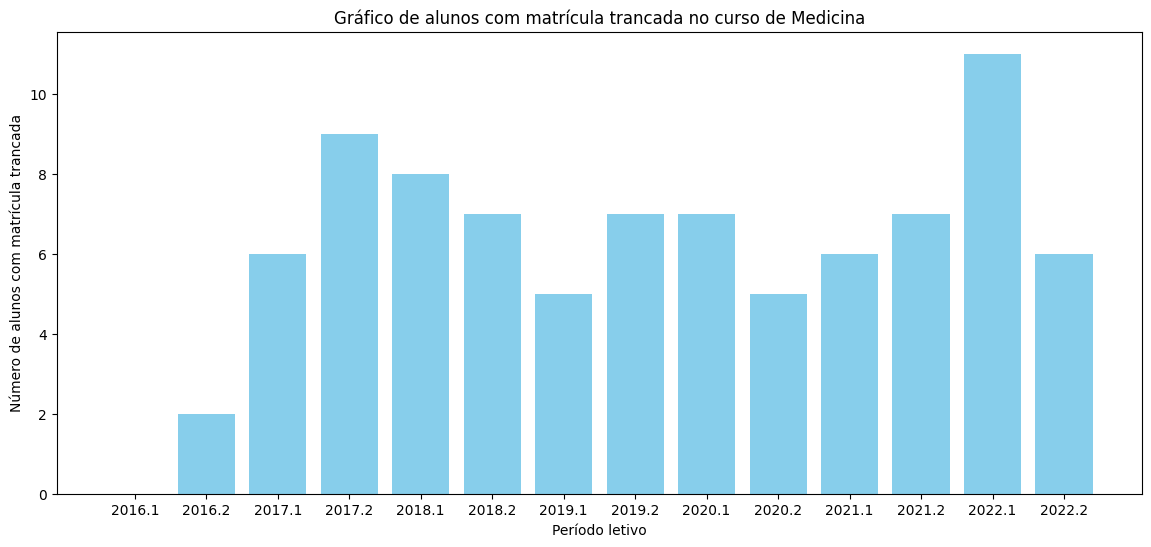

In [98]:
# Vertical Bar Plot

for ii, jj, kk in zip(dados_ENGENHARIA_MATRICULADOS.keys(), dados_ENGENHARIA_MATRICULADOS.values(), dados_ENGENHARIA_TRANCADOS.values()):
    print(f"{ii}: {kk} ({kk/jj*100:.2f}%)")

print(f"Média: {np.mean(list(dados_ENGENHARIA_TRANCADOS.values())):.2f}")

plt.figure(figsize=(14, 6))
plt.bar(dados_ENGENHARIA.keys(), dados_ENGENHARIA_TRANCADOS.values(), color='skyblue')
plt.xlabel('Período letivo')
plt.ylabel('Número de alunos com matrícula trancada')
plt.title(f'Gráfico de alunos com matrícula trancada no curso de {select_curso}')
plt.show()

2016.1: 2 (0.23%)
2016.2: 10 (1.17%)
2017.1: 5 (0.59%)
2017.2: 0 (0.00%)
2018.1: 4 (0.46%)
2018.2: 10 (1.19%)
2019.1: 3 (0.36%)
2019.2: 2 (0.24%)
2020.1: 4 (0.49%)
2020.2: 5 (0.61%)
2021.1: 2 (0.25%)
2021.2: 1 (0.12%)
2022.1: 3 (0.37%)
2022.2: 3 (0.37%)
Média: 3.86


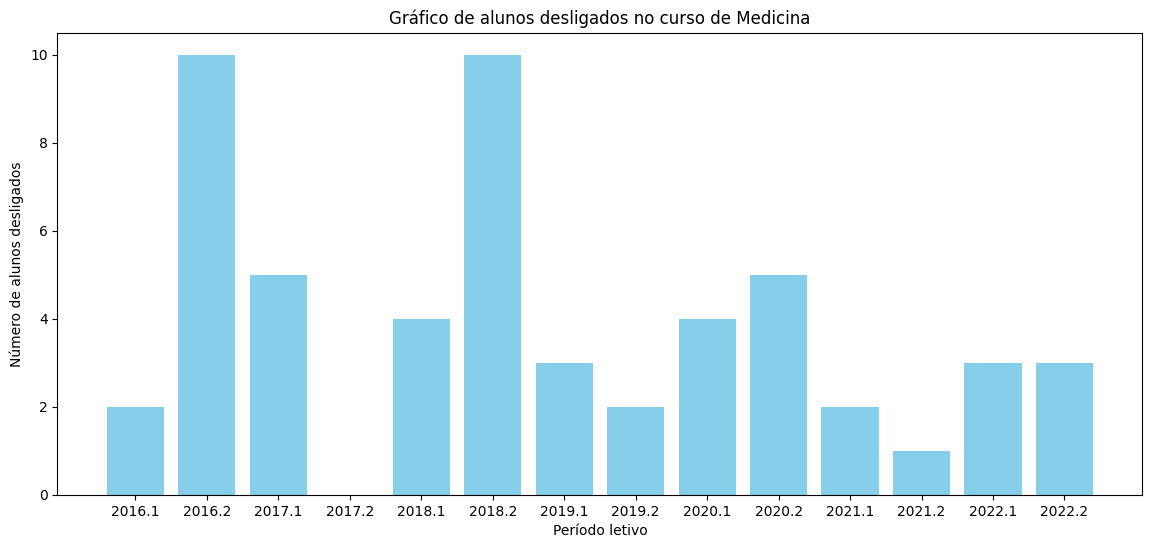

In [99]:
# Vertical Bar Plot

for ii, jj, kk in zip(dados_ENGENHARIA_MATRICULADOS.keys(), dados_ENGENHARIA_MATRICULADOS.values(), dados_ENGENHARIA_DESLIGADOS.values()):
    print(f"{ii}: {kk} ({kk/jj*100:.2f}%)")

print(f"Média: {np.mean(list(dados_ENGENHARIA_DESLIGADOS.values())):.2f}")

plt.figure(figsize=(14, 6))
plt.bar(dados_ENGENHARIA.keys(), dados_ENGENHARIA_DESLIGADOS.values(), color='skyblue')
plt.xlabel('Período letivo')
plt.ylabel('Número de alunos desligados')
plt.title(f'Gráfico de alunos desligados no curso de {select_curso}')
plt.show()